In [1]:
import json
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

In [59]:

train_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/labels/seg_track_20/rles/train/"

img_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/images/seg_track_20/train/"

json_files = os.listdir(train_dir)
image_files = []
c = 0
all_frames = []
for i in json_files:
    data = json.load(open(train_dir+i))
    labels = data['frames']
    for frame in data['frames']:
        single_frame = []
        for i in frame['labels']:
            single_frame.append(i['box2d'])
        all_frames.append(single_frame)
        image_files.append(img_dir+frame['videoName']+"/"+frame["name"])

In [60]:
len(all_frames)

6475

In [61]:

image = cv2.imread(image_files[-1000])
for bb in all_frames[-1000]:
    cv2.rectangle(image, (int(bb['x1']),int(bb['y1'])), (int(bb['x2']),int(bb['y2'])), (0, 0, 255), 2)


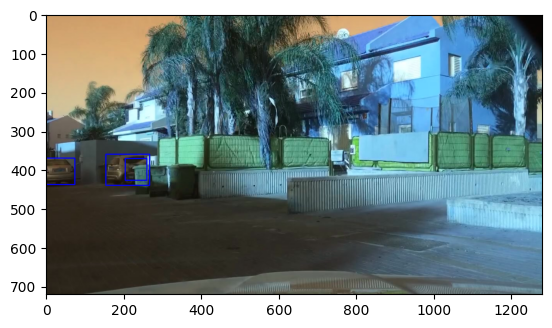

In [62]:
plt.imshow(image)

In [5]:
single_frame

[{'x1': 0.0, 'y1': 387.0, 'x2': 42.0, 'y2': 508.0},
 {'x1': 113.0, 'y1': 406.0, 'x2': 243.0, 'y2': 468.0},
 {'x1': 391.0, 'y1': 147.0, 'x2': 640.0, 'y2': 307.0},
 {'x1': 254.0, 'y1': 259.0, 'x2': 760.0, 'y2': 695.0},
 {'x1': 745.0, 'y1': 366.0, 'x2': 1119.0, 'y2': 577.0},
 {'x1': 687.0, 'y1': 351.0, 'x2': 721.0, 'y2': 381.0},
 {'x1': 699.0, 'y1': 356.0, 'x2': 791.0, 'y2': 453.0},
 {'x1': 67.0, 'y1': 390.0, 'x2': 86.0, 'y2': 440.0},
 {'x1': 90.0, 'y1': 389.0, 'x2': 185.0, 'y2': 435.0},
 {'x1': 137.0, 'y1': 390.0, 'x2': 157.0, 'y2': 417.0},
 {'x1': 259.0, 'y1': 394.0, 'x2': 276.0, 'y2': 424.0},
 {'x1': 1175.0, 'y1': 357.0, 'x2': 1198.0, 'y2': 458.0},
 {'x1': 1029.0, 'y1': 378.0, 'x2': 1041.0, 'y2': 398.0},
 {'x1': 218.0, 'y1': 392.0, 'x2': 249.0, 'y2': 440.0},
 {'x1': 190.0, 'y1': 392.0, 'x2': 217.0, 'y2': 406.0},
 {'x1': 128.0, 'y1': 395.0, 'x2': 146.0, 'y2': 430.0}]

In [6]:
from PIL import Image

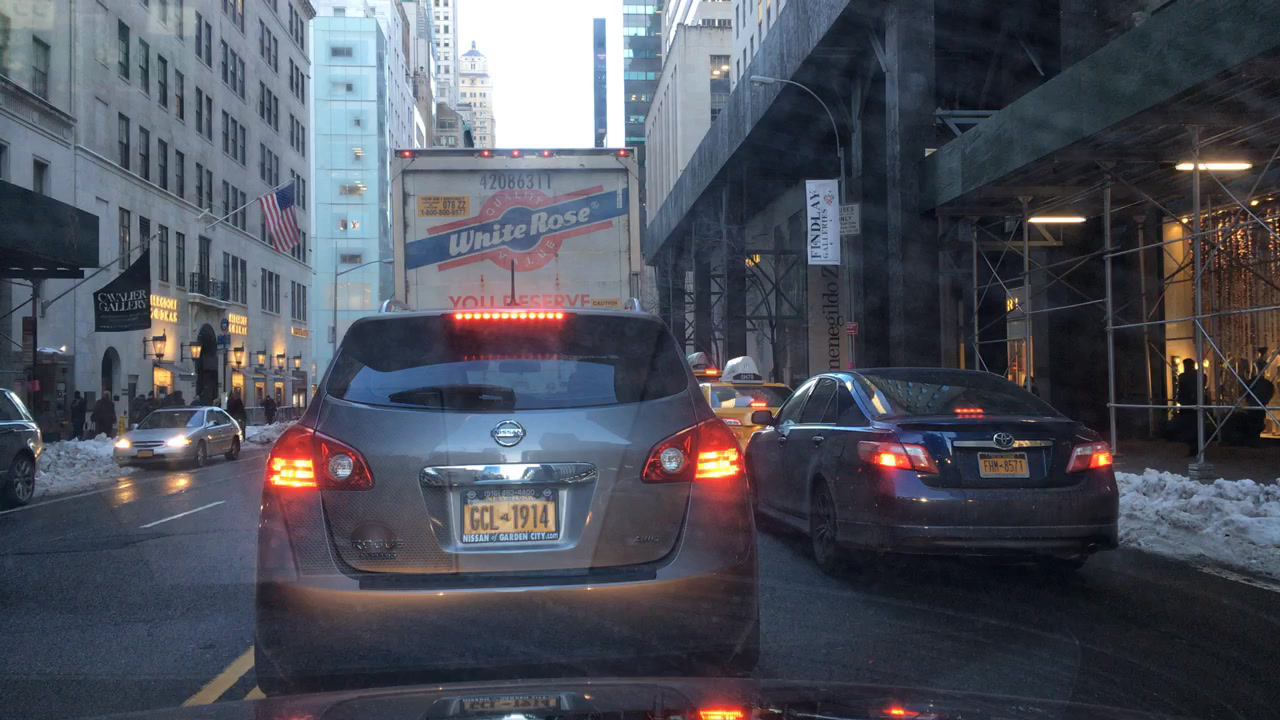

In [7]:
Image.open(image_files[0])

In [57]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 91.1 MB 106 kB/s eta 0:00:01    |▍                               | 993 kB 3.7 MB/s eta 0:00:25     |██████████▉                     | 30.7 MB 3.7 MB/s eta 0:00:17
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done

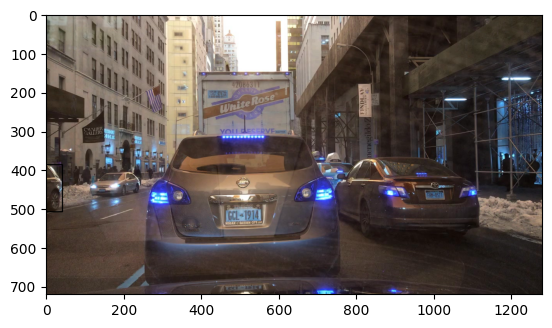

In [17]:
import cv2
result = cv2.imread(image_files[0])
image = cv2.rectangle(result, (0, 387), (42, 508), (0, 0, 0), 2)
# cv2.imshow("Image",image)
plt.imshow(image)

In [ ]:
import cv2
import numpy as np

# read image
img = cv2.imread(image_files[0])

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)[1]

# get contours
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    print("x,y,w,h:",x,y,w,h)
 
# save resulting image
cv2.imwrite('two_blobs_result.jpg',result)      

# show thresh and result    
cv2.imshow("bounding_box", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

[[1012.0, 268.0, 1196.0, 1196.0], [684.0, 294.0, 727.0, 727.0], [520.0, 293.0, 620.0, 620.0], [1179.0, 303.0, 1215.0, 1215.0], [748.0, 296.0, 829.0, 829.0], [741.0, 311.0, 937.0, 937.0], [897.0, 290.0, 989.0, 989.0], [1218.0, 327.0, 1279.0, 1279.0], [438.0, 285.0, 583.0, 583.0], [599.0, 301.0, 637.0, 637.0], [635.0, 303.0, 685.0, 685.0], [624.0, 319.0, 646.0, 646.0], [387.0, 305.0, 402.0, 402.0], [178.0, 289.0, 203.0, 203.0], [352.0, 299.0, 370.0, 370.0], [87.0, 280.0, 113.0, 113.0], [993.0, 329.0, 1006.0, 1006.0], [104.0, 286.0, 138.0, 138.0], [407.0, 300.0, 421.0, 421.0], [423.0, 303.0, 437.0, 437.0], [438.0, 309.0, 449.0, 449.0], [1014.0, 328.0, 1024.0, 1024.0], [1005.0, 329.0, 1011.0, 1011.0]]


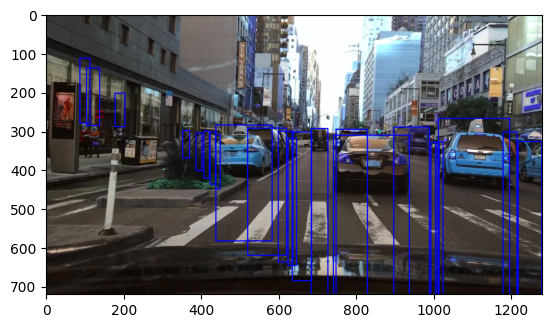

In [11]:
import os
import numpy as np
import torch
from PIL import Image
import json 
import cv2
import matplotlib.pyplot as plt

class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, root_image_dir, type):
        self.json_root_dir = root_dir + type + "/"
        self.img_dir = root_image_dir + type +"/"
        
        json_files = os.listdir(self.json_root_dir)
        image_file = []
        c = 0
        all_frames = []
        for i in json_files:
            data = json.load(open(self.json_root_dir+i))
            # labels = data['frames']
            for frame in data['frames']:
                single_frame = []
                for j in frame['labels']:
                    single_frame.append(j['box2d'])
                all_frames.append(single_frame)
                image_file.append(self.img_dir+frame['videoName']+"/"+frame["name"])
        self.image_files = image_file
        self.bounding_box = all_frames

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.image_files[idx])
        bound_box = self.bounding_box[idx]
        # img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        # mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        # img = Image.open(img_path).convert("RGB")
        img = cv2.imread(img_path)
        boxes = []
        for i in bound_box:
            boxes.append([i['x1'], i['y1'], i['x2'], i['x2']])
        print(boxes)
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {}
        target["boxes"] = boxes
        target["image_id"] = image_id
        target["area"] = area

        # if self.transforms is not None:
        #     img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.image_files)
    

train_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/labels/seg_track_20/rles/"

img_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/images/seg_track_20/"
train = PennFudanDataset(train_dir, img_dir,"train")

params = {'batch_size': 1,
    'shuffle': True}
train_dataloader = torch.utils.data.DataLoader(train,**params)
for image, target in train_dataloader:
    # image = cv2.imread(image_files[-1000])
    image = image.cpu().detach().squeeze().numpy()
    # print(target)
    for bb in target["boxes"][0]:
        cv2.rectangle(image, (int(bb[0]),int(bb[1])), (int(bb[2]),int(bb[3])), (0, 0, 255), 2)
    plt.imshow(image)
    break

In [ ]:

root_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/labels/seg_track_20/rles/"
img_dir = "/home/sci/mkaranam/Desktop/DL_Image_Analysis_project_Detection/bdd100k/images/seg_track_20/"
json_root_dir = root_dir + type + "/"
json_files = os.listdir(json_root_dir)
image_file = []
c = 0
all_frames = []
for i in json_files:
    data = json.load(open(json_root_dir+i))
    # labels = data['frames']
    for frame in data['frames']:
        single_frame = []
        for j in frame['labels']:
            single_frame.append(j['box2d'])
        all_frames.append(single_frame)
        image_file.append(img_dir+frame['videoName']+"/"+frame["name"])